<h2> Вариант 24

In [2]:
from math import cos, sin, asin
def f(x,y):
    return cos(x)+y-1.2
def g(x,y):
    return 2*x-sin(y-0.5)-2
def F(x,y):
    return f(x,y)**2+g(x,y)**2

def ff(x):
    return cos(x)-1.2
def gg(x):
    try:
        return asin(2*x-2)+0.5
    except:
        return None

<h2> Вариант 25

In [ ]:
from math import cos, sin
def f(x,y):
    return cos(y+0.5)+x-0.8
def g(x,y):
    return sin(x)-2*y-1.6
def F(x,y):
    return f(x,y)**2+g(x,y)**2

<h2>Графики функций

0.61 -0.3803519821545204


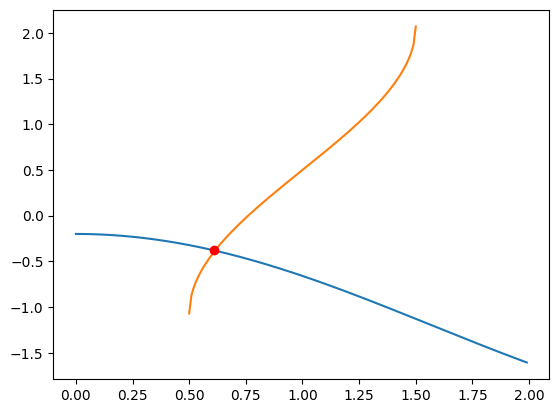

In [13]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 2, 0.01)
y1=[]
y2=[]
dx=0
dy=0
fi=10000
for i in x:
    y1.append(ff(i))
    y2.append(gg(i))
    try:
        if abs(y1[-1] - y2[-1]) < fi:
            fi = abs(y1[-1] - y2[-1] )
            dx = i
            dy = y1[-1]
    except:
        pass
print(dx, dy)
    
plt.plot(x, y1, x, y2, dx, dy, 'ro')
plt.show()